In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install -q -U timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
import os, sys
from os.path import exists
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from sklearn.model_selection import train_test_split
import timm


In [3]:

from drive.MyDrive.fusedmammonet.models import *
from drive.MyDrive.fusedmammonet.train import *
from drive.MyDrive.fusedmammonet.metrics import *
from drive.MyDrive.fusedmammonet.dataset import *


In [4]:
train_dataloader,val_dataloader,test_dataloader=create_loaders('/content/drive/MyDrive/fusedmammonet/ddsm')
print(f'Training dataset size: {len(train_dataloader)}')
print(f'Test dataset size: {len(test_dataloader)}')

Training dataset size: 210
Test dataset size: 70


For initial training purpose use this

In [5]:
select_model={1:mobilenet(num_classes=5),
              2:efficientnet(num_classes=5),
              3:inceptionv3(num_classes=5),
              4:ensemble(mobilenet_tl(num_classes=5),efficientnet_tl(num_classes=5),inceptionv3_tl(num_classes=5),num_classes=5),
              5:ensemble_tl(mobilenet_tl(num_classes=5),efficientnet_tl(num_classes=5),inceptionv3_tl(num_classes=5),num_classes=5)
              }
model= select_model[5]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/95.5M [00:00<?, ?B/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3848 | train_acc: 0.8792 | test_loss: 0.4921 | test_acc: 0.8734
Saved model with test accuracy: 0.8734
Epoch: 2 | train_loss: 0.2565 | train_acc: 0.9058 | test_loss: 0.3660 | test_acc: 0.8769
Saved model with test accuracy: 0.8769
Epoch: 3 | train_loss: 0.2203 | train_acc: 0.9199 | test_loss: 0.3008 | test_acc: 0.8954
Saved model with test accuracy: 0.8954
Epoch: 4 | train_loss: 0.1983 | train_acc: 0.9263 | test_loss: 0.2692 | test_acc: 0.9056
Saved model with test accuracy: 0.9056
Epoch: 5 | train_loss: 0.1583 | train_acc: 0.9418 | test_loss: 0.2875 | test_acc: 0.9095
Saved model with test accuracy: 0.9095
Epoch: 6 | train_loss: 0.1511 | train_acc: 0.9445 | test_loss: 0.2845 | test_acc: 0.9088
Epoch: 7 | train_loss: 0.1196 | train_acc: 0.9539 | test_loss: 0.3670 | test_acc: 0.9091
Epoch: 8 | train_loss: 0.1133 | train_acc: 0.9604 | test_loss: 0.3149 | test_acc: 0.9105
Saved model with test accuracy: 0.9105
Epoch: 9 | train_loss: 0.0917 | train_acc: 0.9686 | te

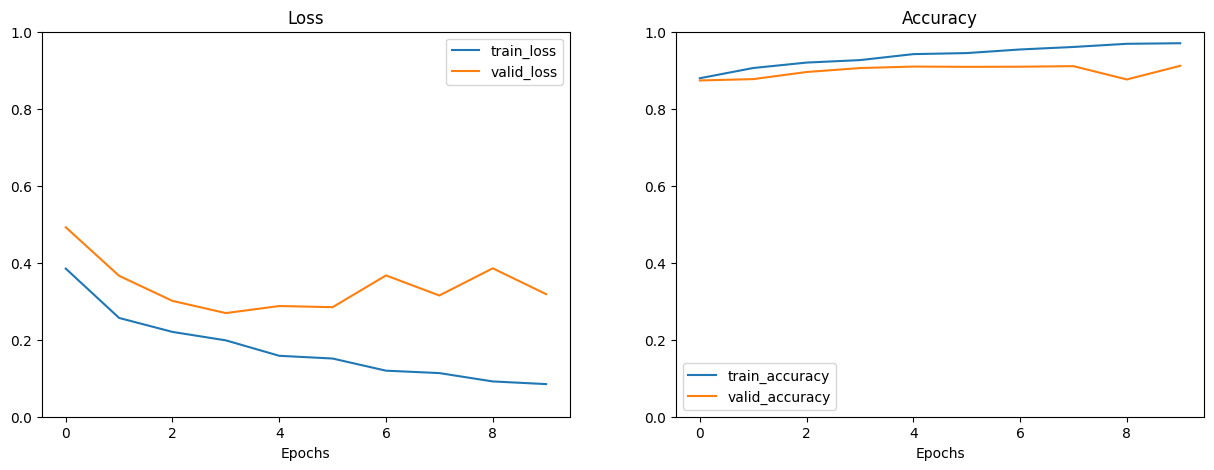

In [7]:
# Create optimizer and loss function
model= select_model[1]
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

results =train(model=model,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=val_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device='cuda' if torch.cuda.is_available() else 'cpu',
                              save_path='/content/drive/MyDrive/fusedmammonet/models/best_model_mobilenet.pth')
plot_and_save_loss_curves(results,save_folder='/content/drive/MyDrive/fusedmammonet/results', save_name="mobilenet_loss_curves")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3549 | train_acc: 0.8855 | test_loss: 0.3167 | test_acc: 0.8971
Saved model with test accuracy: 0.8971
Epoch: 2 | train_loss: 0.2342 | train_acc: 0.9144 | test_loss: 0.2652 | test_acc: 0.8989
Saved model with test accuracy: 0.8989
Epoch: 3 | train_loss: 0.1803 | train_acc: 0.9344 | test_loss: 0.3030 | test_acc: 0.9075
Saved model with test accuracy: 0.9075
Epoch: 4 | train_loss: 0.1609 | train_acc: 0.9417 | test_loss: 0.2627 | test_acc: 0.9124
Saved model with test accuracy: 0.9124
Epoch: 5 | train_loss: 0.1285 | train_acc: 0.9507 | test_loss: 0.3498 | test_acc: 0.9029
Epoch: 6 | train_loss: 0.1128 | train_acc: 0.9581 | test_loss: 0.3406 | test_acc: 0.9114
Epoch: 7 | train_loss: 0.0964 | train_acc: 0.9644 | test_loss: 0.2941 | test_acc: 0.9177
Saved model with test accuracy: 0.9177
Epoch: 8 | train_loss: 0.0859 | train_acc: 0.9700 | test_loss: 0.3393 | test_acc: 0.9021
Epoch: 9 | train_loss: 0.0724 | train_acc: 0.9757 | test_loss: 0.3319 | test_acc: 0.9123
Epoc

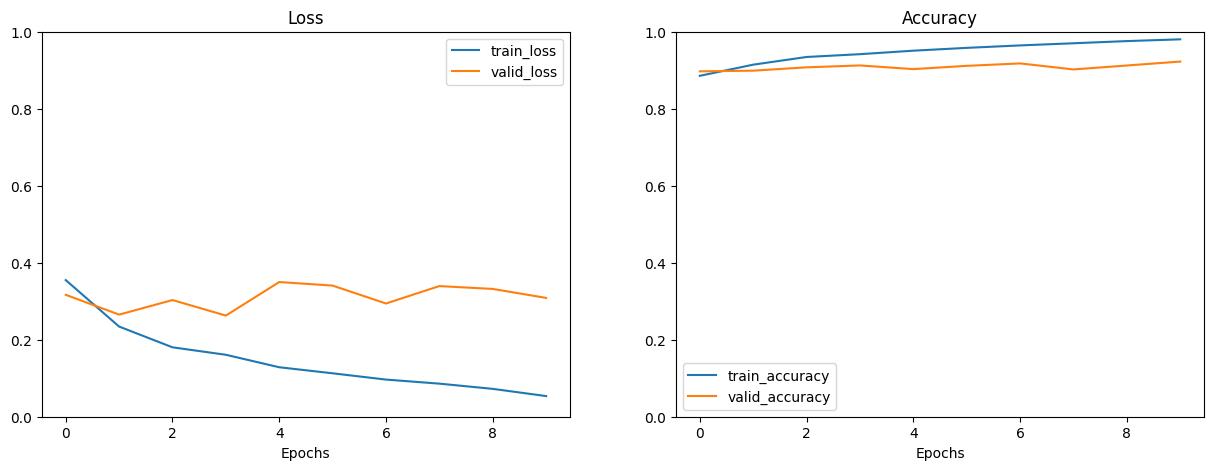

In [8]:
# Create optimizer and loss function
model= select_model[2]
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

results =train(model=model,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=val_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device='cuda' if torch.cuda.is_available() else 'cpu',
                              save_path='/content/drive/MyDrive/fusedmammonet/models/best_model_efficientnet.pth')
plot_and_save_loss_curves(results,save_folder='/content/drive/MyDrive/fusedmammonet/results', save_name="efficientnet_loss_curves")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4607 | train_acc: 0.8630 | test_loss: 0.4985 | test_acc: 0.8640
Saved model with test accuracy: 0.8640
Epoch: 2 | train_loss: 0.3749 | train_acc: 0.8765 | test_loss: 0.3687 | test_acc: 0.8769
Saved model with test accuracy: 0.8769
Epoch: 3 | train_loss: 0.3227 | train_acc: 0.8870 | test_loss: 0.8493 | test_acc: 0.8424
Epoch: 4 | train_loss: 0.3141 | train_acc: 0.8883 | test_loss: 0.3593 | test_acc: 0.8841
Saved model with test accuracy: 0.8841
Epoch: 5 | train_loss: 0.3059 | train_acc: 0.8943 | test_loss: 0.3883 | test_acc: 0.8715
Epoch: 6 | train_loss: 0.2793 | train_acc: 0.8993 | test_loss: 0.3348 | test_acc: 0.8877
Saved model with test accuracy: 0.8877
Epoch: 7 | train_loss: 0.2686 | train_acc: 0.9028 | test_loss: 0.3657 | test_acc: 0.8904
Saved model with test accuracy: 0.8904
Epoch: 8 | train_loss: 0.2538 | train_acc: 0.9066 | test_loss: 0.3291 | test_acc: 0.8930
Saved model with test accuracy: 0.8930
Epoch: 9 | train_loss: 0.2465 | train_acc: 0.9069 | te

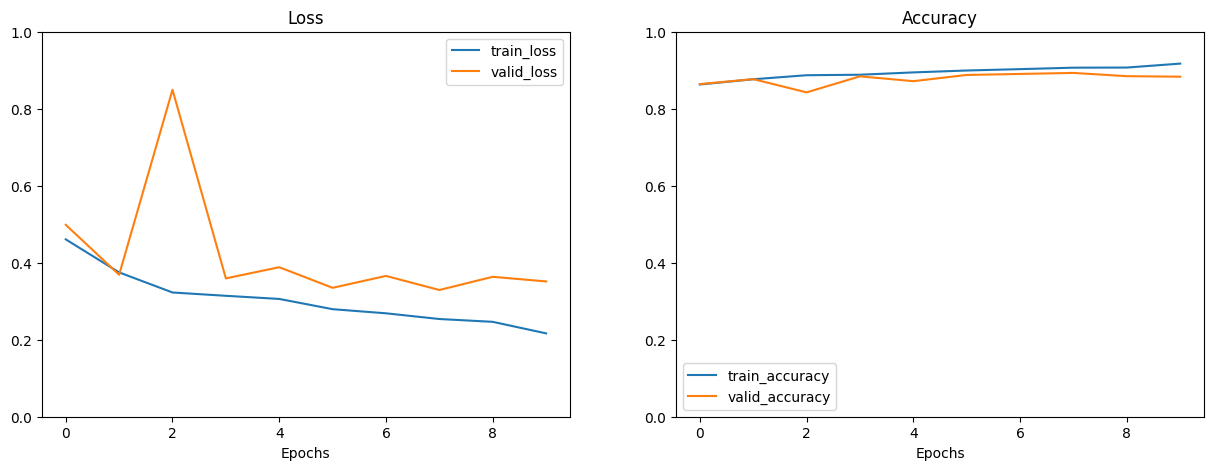

In [9]:
model= select_model[3]
# Create optimizer and loss function
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

results =train(model=model,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=val_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device='cuda' if torch.cuda.is_available() else 'cpu',
                              save_path='/content/drive/MyDrive/fusedmammonet/models/best_model_inceptionv3.pth')
plot_and_save_loss_curves(results,save_folder='/content/drive/MyDrive/fusedmammonet/results', save_name="inceptionv3_loss_curves")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0095 | train_acc: 0.9033 | test_loss: 0.9608 | test_acc: 0.9513
Saved model with test accuracy: 0.9513
Epoch: 2 | train_loss: 0.9547 | train_acc: 0.9561 | test_loss: 0.9483 | test_acc: 0.9598
Saved model with test accuracy: 0.9598
Epoch: 3 | train_loss: 0.9455 | train_acc: 0.9618 | test_loss: 0.9463 | test_acc: 0.9580
Epoch: 4 | train_loss: 0.9436 | train_acc: 0.9638 | test_loss: 0.9422 | test_acc: 0.9647
Saved model with test accuracy: 0.9647
Epoch: 5 | train_loss: 0.9413 | train_acc: 0.9655 | test_loss: 0.9432 | test_acc: 0.9621
Epoch: 6 | train_loss: 0.9410 | train_acc: 0.9643 | test_loss: 0.9418 | test_acc: 0.9638
Epoch: 7 | train_loss: 0.9393 | train_acc: 0.9669 | test_loss: 0.9460 | test_acc: 0.9594
Epoch: 8 | train_loss: 0.9390 | train_acc: 0.9667 | test_loss: 0.9412 | test_acc: 0.9634
Epoch: 9 | train_loss: 0.9385 | train_acc: 0.9668 | test_loss: 0.9409 | test_acc: 0.9643
Epoch: 10 | train_loss: 0.9368 | train_acc: 0.9688 | test_loss: 0.9415 | test_acc:

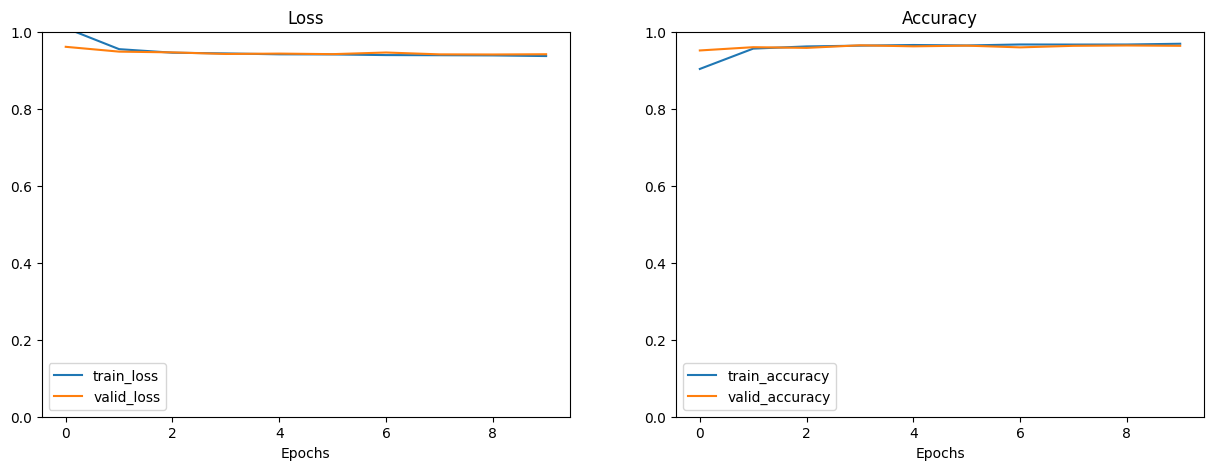

In [10]:
model= select_model[4]
# Create optimizer and loss function
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

results =train(model=model,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=val_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device='cuda' if torch.cuda.is_available() else 'cpu',
                              save_path='/content/drive/MyDrive/fusedmammonet/models/best_model_ensemble.pth')
plot_and_save_loss_curves(results,save_folder='/content/drive/MyDrive/fusedmammonet/results', save_name="loss_curves")


   class  specificity  sensitivity
0      0     0.915541     0.997938
1      1     0.993948     0.772727
2      2     0.994457     0.774648
3      3     0.994023     0.655738
4      4     0.993981     0.802632
              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99      1940
     class 1       0.84      0.77      0.80        88
     class 2       0.82      0.77      0.80        71
     class 3       0.75      0.66      0.70        61
     class 4       0.82      0.80      0.81        76

    accuracy                           0.97      2236
   macro avg       0.85      0.80      0.82      2236
weighted avg       0.96      0.97      0.96      2236

[[1936    1    1    1    1]
 [   5   68    2   11    2]
 [   8    2   55    1    5]
 [   8    8    0   40    5]
 [   4    2    9    0   61]]
Figures saved at: /content/drive/MyDrive/fusedmammonet/results/confusion matrix.png


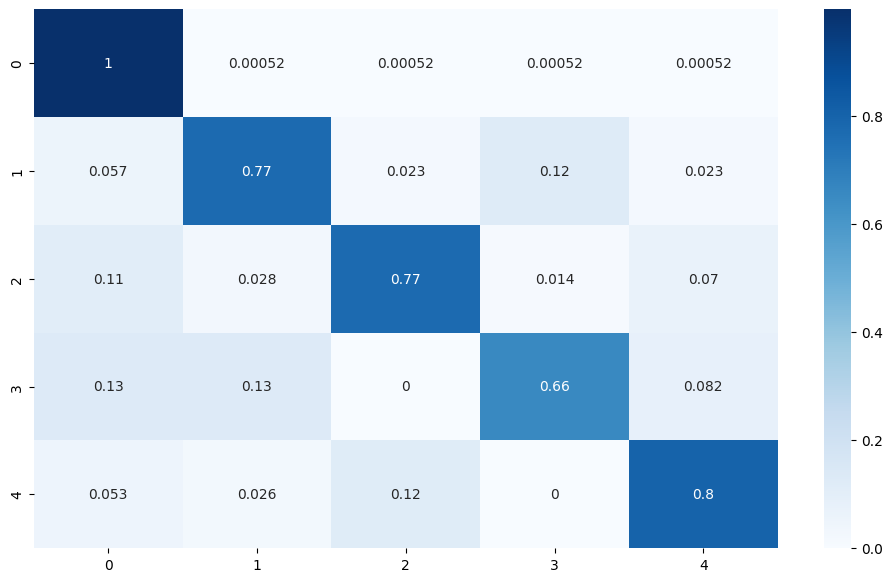

Figures saved at: /content/drive/MyDrive/fusedmammonet/results/aucroc.png


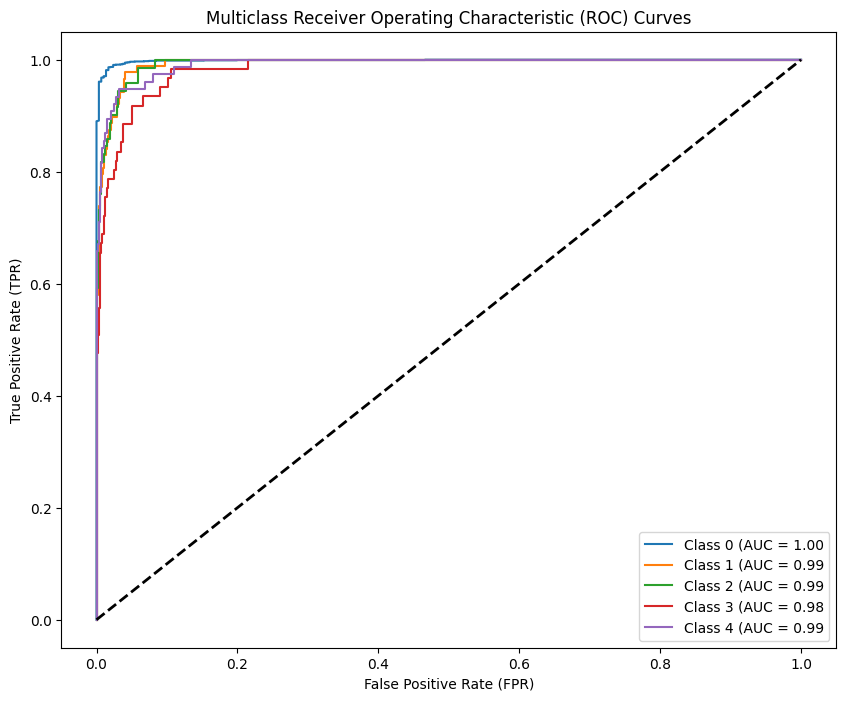

In [6]:
model= select_model[5]
y_true = []
y_pred = []
y_scores=[]
# Initialize your model (efficientnet_b0_model) and test_loader

# Rest of your code to get predictions
#model=model.to('cpu')
for inputs, labels in test_dataloader:
    output1 = model(inputs.to('cpu'))  # Feed Network
    probs_1 = torch.softmax(output1, dim=1)
    _, predicted_class = torch.max(probs_1, 1)
    labels = labels.data.numpy()
    y_true.extend(labels)
    y_pred.extend(predicted_class.cpu().data.numpy())
    y_scores.extend(probs_1.cpu().data.numpy())
ops(y_true,y_pred,y_scores,save_folder='/content/drive/MyDrive/fusedmammonet/results',num_classes=5)